## MNIST using CNN

### 데이터 로드

In [14]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train, X_test = x_train/255, x_test/255

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### 모델 구조

In [15]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(3, kernel_size=(3, 3), strides=(1, 1),
                 padding='same', activation='relu',
                 input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 3)         30        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 3)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 3)         0         
                                                                 
 flatten_1 (Flatten)         (None, 588)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              589000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                      

### 구성한 layers들을 호출

In [17]:
model.layers

### 아직 학습하지 않은 conv레이어의 웨이트의 평균

In [18]:
conv = model.layers[0]
conv_weights = conv.weights[0].numpy()
conv_weights.mean(), conv_weights.std()

(0.045121983, 0.21292676)

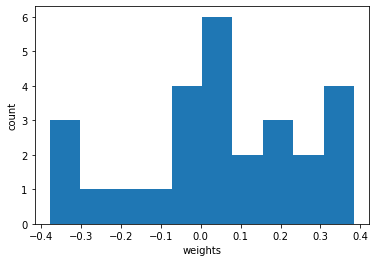

In [19]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

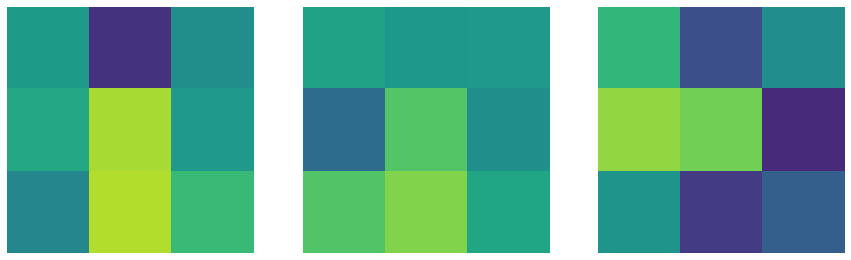

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5)
    ax[i].axis('off')
    
plt.show()

### 학습이 빨리 된다

In [21]:
%%time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist=model.fit(X_train, y_train, epochs=5, verbose=1,
              validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2429 - accuracy: 0.9231 - val_loss: 0.1042 - val_accuracy: 0.9658
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1165 - accuracy: 0.9631 - val_loss: 0.0664 - val_accuracy: 0.9783
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0848 - accuracy: 0.9734 - val_loss: 0.0625 - val_accuracy: 0.9792
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0674 - accuracy: 0.9778 - val_loss: 0.0522 - val_accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0598 - accuracy: 0.9807 - val_loss: 0.0495 - val_accuracy: 0.9848
Wall time: 51.5 s


### 학습 후 conv filter의 변화

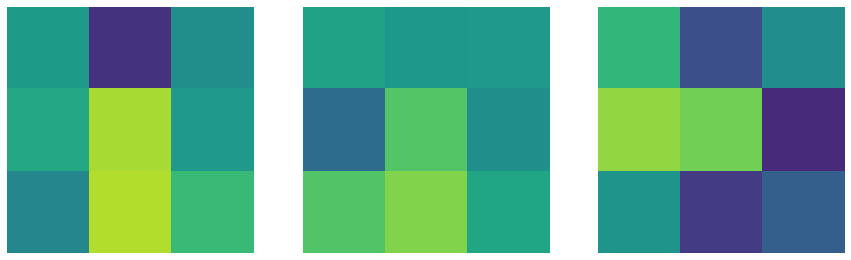

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5)
    ax[i].axis('off')
    
plt.show()

### 0번 데이터 5

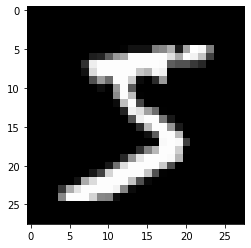

In [24]:
plt.imshow(X_train[0], cmap='gray');

### Conv 레이어에서 출력을 뽑음

In [25]:
inputs = X_train[0].reshape(-1, 28, 28, 1)
conv_layer_output = tf.keras.Model(model.input, model.layers[0].output)
conv_layer_output.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 3)         30        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


### 입력에 대한 feature map을 뽑음

In [26]:
feature_maps = conv_layer_output.predict(inputs)
feature_maps.shape

(1, 28, 28, 3)

In [27]:
feature_maps[0, :, :, 0].shape

(28, 28)

### Feature map이 본 숫자 5

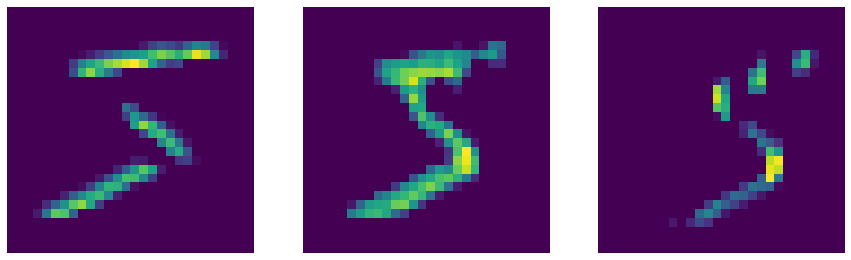

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].imshow(feature_maps[0, :, :, i])
    ax[i].axis('off')
    
plt.show()

### 방금 전 과정을 함수로 생성


In [29]:
def draw_feature_maps(n):
    inputs = X_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)
    
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    
    ax[0].imshow(inputs[0, :, :, 0], cmap='gray');
    for i in range(1, 4):
        ax[i].imshow(feature_maps[0, :, :, i-1])
        ax[i].axis('off')
        
    plt.show()

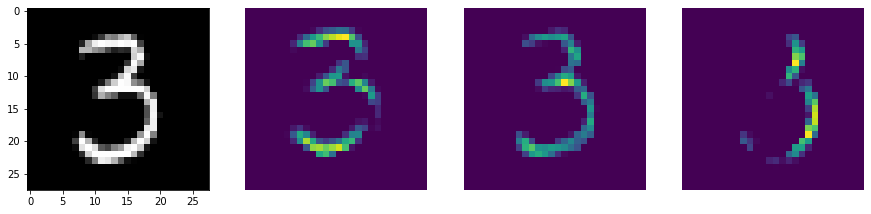

In [30]:
draw_feature_maps(50)

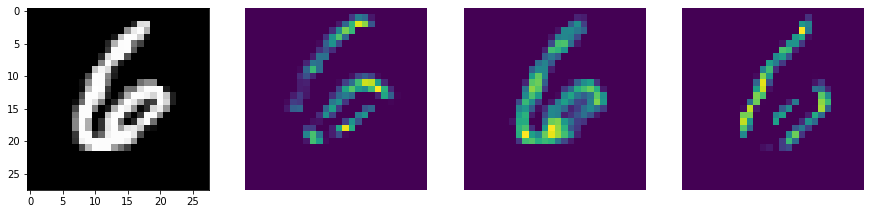

In [31]:
draw_feature_maps(13)

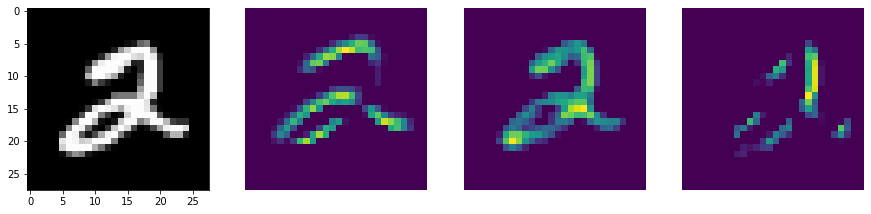

In [32]:
draw_feature_maps(5)

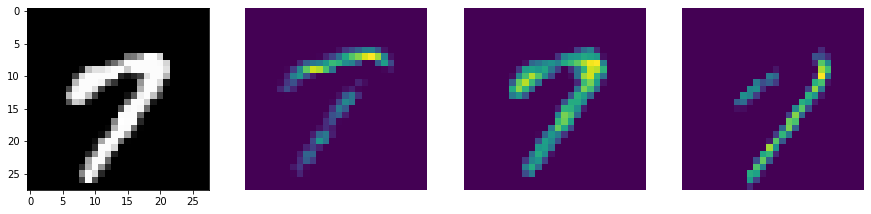

In [33]:
draw_feature_maps(15)

### 이번에는 모델 채널을 증가시키자

In [34]:
model1 = models.Sequential([
    layers.Conv2D(8, kernel_size=(3, 3), strides=(1, 1),
                 padding='same', activation='relu',
                 input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [35]:
%%time

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist=model1.fit(X_train, y_train, epochs=5, verbose=1,
              validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1704 - accuracy: 0.9484 - val_loss: 0.0641 - val_accuracy: 0.9797
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0677 - accuracy: 0.9785 - val_loss: 0.0447 - val_accuracy: 0.9853
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.0547 - val_accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0350 - accuracy: 0.9883 - val_loss: 0.0384 - val_accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0400 - val_accuracy: 0.9866
Wall time: 1min 25s


In [36]:
conv_layer_output = tf.keras.Model(model1.input, model1.layers[0].output)

def draw_feature_maps(n):
    inputs = X_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)
    
    fig, ax = plt.subplots(1, 9, figsize=(15, 5))
    
    ax[0].imshow(inputs[0, :, :, 0], cmap='gray');
    for i in range(1, 9):
        ax[i].imshow(feature_maps[0, :, :, i-1])
        ax[i].axis('off')
        
    plt.show()

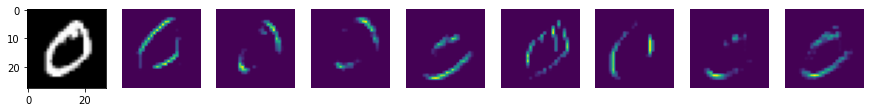

In [38]:
draw_feature_maps(1)

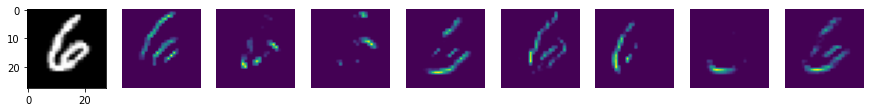

In [39]:
draw_feature_maps(13)

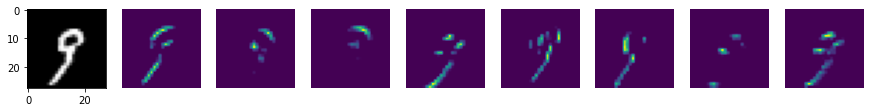

In [40]:
draw_feature_maps(19)

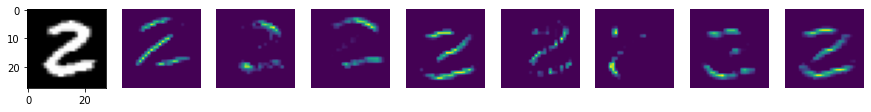

In [41]:
draw_feature_maps(25)